## CNN (convolutional neural network)
- 전반: 3차원 이미지 입력받아 특징 추출
- 후반: 특징 입력 받아 분류
- 커널,필터,마스크: 가중치로 구성되며, 일반적으로 3x3, 5x5 로 구성
    - 이미지 위를 일정 간격 이동
- 패딩 padding: 커널(필터) 이동시 좌우상하 모서리부분 추출안되는걸 보완하기 위함
    - 입력 데이터 사면을 특정값(0)으로 채운후 합성곱층 진행
- 풀링 pulling layer: 합성곱 층 다음에 풀링 층 추가
    - 특정 맵을 다운샘플링하여 특성 맵의 크기 줄이는 풀링 연산 진행
    - 커널크기: 2X2
    - 합성곱과 달리 커널이 중첩되지 않음
    - 종류: 최대 풀링, 평균 풀링

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
# 모델 도식화 가능
from keras.utils import plot_model
from keras import Sequential
from keras.utils import set_random_seed
from keras.datasets.fashion_mnist import load_data

In [8]:
set_random_seed(42)

In [6]:
(train_x, train_y), (test_x, test_y) = load_data()

In [7]:
# 전처리
train_scaled = train_x /255.0
train_scaled = train_scaled.reshape(-1,28,28,1)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_y, test_size=0.2, random_state=42)
test_scaled = test_x /255.0
test_scaled = test_scaled.reshape(-1,28,28,1)

In [10]:
md = Sequential()
md.add(Conv2D(28, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
md.add(MaxPool2D(2))
md.add(Conv2D(56, kernel_size=(3,3), activation='relu', padding='same'))
md.add(MaxPool2D(2))
md.add(Flatten())
md.add(Dense(100, activation='relu'))
md.add(Dropout(0.4))
md.add(Dense(10, activation='softmax'))
md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 56)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2744)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

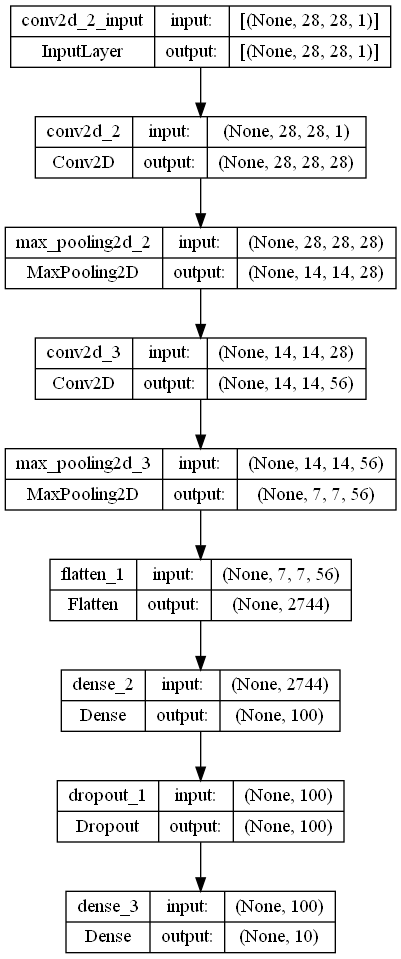

In [11]:
plot_model(md, show_shapes=True, to_file='md.png')

In [12]:
md.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = md.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.5385 - accuracy: 0.8071 - val_loss: 0.3324 - val_accuracy: 0.8783
Epoch 2/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.3573 - accuracy: 0.8728 - val_loss: 0.2836 - val_accuracy: 0.8944
Epoch 3/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3060 - accuracy: 0.8892 - val_loss: 0.2549 - val_accuracy: 0.9077
Epoch 4/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2750 - accuracy: 0.9004 - val_loss: 0.2505 - val_accuracy: 0.9079
Epoch 5/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2479 - accuracy: 0.9091 - val_loss: 0.2285 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2284 - accuracy: 0.9152 - val_loss: 0.2180 - val_accuracy: 0.9186
Epoch 7/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2111 - accuracy: 0.9233 - val_loss: 0.2193 -